In [84]:
import pandas as pd

In [85]:
df = pd.read_csv("question4-stock-data.csv")

In [86]:
df.head()

,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume
0,0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11291 non-null  int64  
 1   Date        11181 non-null  object 
 2   Adj Close   11198 non-null  float64
 3   Close       11174 non-null  float64
 4   High        11196 non-null  float64
 5   Low         11164 non-null  float64
 6   Open        11188 non-null  float64
 7   Volume      11146 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 705.8+ KB


In [88]:
df.describe()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
count,11291.000000,11198.000000,11174.000000,11196.000000,11164.000000,11188.000000,1.114600e+04
mean,5645.000000,63.609130,72.026945,72.503100,71.665079,67.999259,2.144157e+05
std,3259.575279,52.266247,51.259828,51.550735,51.011632,55.834401,3.883662e+05
min,0.000000,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00
25%,2822.500000,19.224636,27.500000,27.789255,27.536156,0.000000,1.350000e+04
50%,5645.000000,50.608900,66.035000,66.724998,65.418751,66.065002,9.032350e+04
75%,8467.500000,104.723621,114.297503,114.892500,113.639999,114.269997,2.915750e+05
max,11290.000000,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07


In [89]:
df.isnull().sum()

,0
Unnamed: 0,0
Date,110
Adj Close,93
Close,117
High,95
Low,127
Open,103
Volume,145


In [90]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [91]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0


In [92]:
df['Date'] = pd.to_datetime(df['Date'])

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       11181 non-null  datetime64[ns]
 1   Adj Close  11198 non-null  float64       
 2   Close      11174 non-null  float64       
 3   High       11196 non-null  float64       
 4   Low        11164 non-null  float64       
 5   Open       11188 non-null  float64       
 6   Volume     11146 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 617.6 KB


In [94]:
df.fillna(method='ffill', inplace=True)

<ipython-input-94-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [95]:
df.isnull().sum()

,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [96]:
def feature_engineering(df):
    df["Daily_Return"] = df["Close"].pct_change()  # Calculate daily return
    df["10-Day_MA"] = df["Close"].rolling(window=10).mean()  # 10-day Moving Average
    df["Volatility"] = df["Close"].rolling(window=10).std()  # 10-day Rolling Standard Deviation
    df.dropna(inplace=True)  # Drop NaN values created by rolling calculations
    return df

In [97]:
df = feature_engineering(df)

In [98]:
df['Close_5_Days_Ahead'] = df['Close'].shift(-5)

In [99]:
df.dropna(inplace=True)

In [100]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 11277 entries, 9 to 11285
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                11277 non-null  datetime64[ns]
 1   Adj Close           11277 non-null  float64       
 2   Close               11277 non-null  float64       
 3   High                11277 non-null  float64       
 4   Low                 11277 non-null  float64       
 5   Open                11277 non-null  float64       
 6   Volume              11277 non-null  float64       
 7   Daily_Return        11277 non-null  float64       
 8   10-Day_MA           11277 non-null  float64       
 9   Volatility          11277 non-null  float64       
 10  Close_5_Days_Ahead  11277 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.0 MB
None
         Date  Adj Close     Close      High       Low      Open   Volume  \
9  1980-03-28   2.315470  

In [101]:
import matplotlib.pyplot as plt

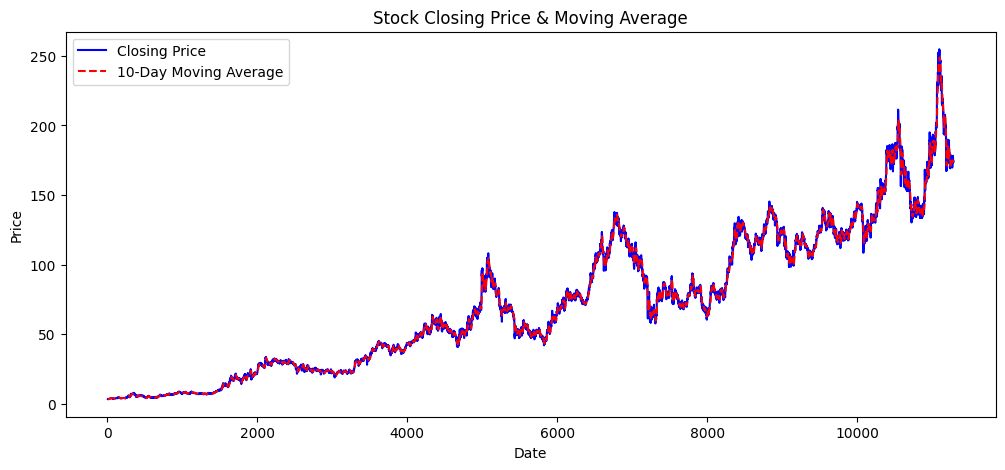

In [102]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Close"], label="Closing Price", color="blue")
plt.plot(df.index, df["10-Day_MA"], label="10-Day Moving Average", linestyle="dashed", color="red")
plt.title("Stock Closing Price & Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [103]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [104]:
df_numeric = df.drop(['Date', 'Close_5_Days_Ahead'], axis=1)  # Drop non-numeric columns
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns, index=df.index)

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [106]:
X = df_scaled
y = df['Close_5_Days_Ahead']

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression

In [110]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Model Performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

Model Performance:
MAE: 1.8463
MSE: 8.7882
RMSE: 2.9645


In [111]:
df_test = X_test.copy()
df_test['Actual_Close'] = y_test
df_test['Predicted_Close'] = y_pred

In [112]:
df_test['Daily_Return_Actual'] = df_test['Actual_Close'].pct_change()
df_test['Daily_Return_Predicted'] = df_test['Predicted_Close'].pct_change()

In [113]:
df_test['Cumulative_Return_Actual'] = (1 + df_test['Daily_Return_Actual']).cumprod()
df_test['Cumulative_Return_Predicted'] = (1 + df_test['Daily_Return_Predicted']).cumprod()

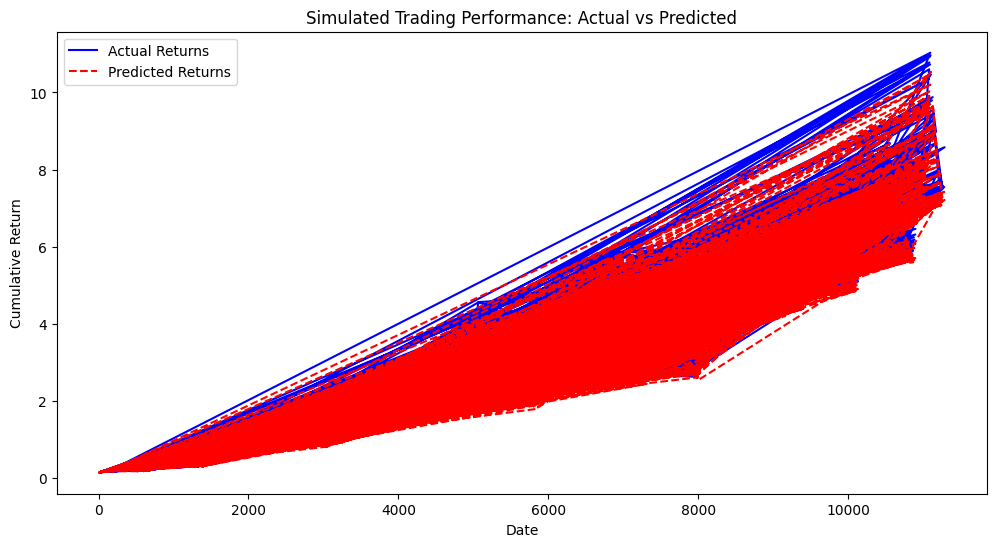

In [114]:
plt.figure(figsize=(12, 6))
plt.plot(df_test.index, df_test['Cumulative_Return_Actual'], label="Actual Returns", color="blue")
plt.plot(df_test.index, df_test['Cumulative_Return_Predicted'], label="Predicted Returns", color="red", linestyle="dashed")
plt.title("Simulated Trading Performance: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

In [115]:
predictions = pd.DataFrame({
    'Date': df_test.index,
    'Actual_Close': df_test['Actual_Close'],
    'Predicted_Close': df_test['Predicted_Close']
})
predictions.to_csv('predictions.csv', index=False)